<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21619" size=6px>                   
                    <b>  IRIS FLOWER CLASSIFICATION 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                   
                    <b> ----------------------------------------------------------------------------------------------------------------------- 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=5px>                   
                    <b>  OASIS INFOBYTE 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4.5px>                   
                    <b>  (DATA SCIENCE INTERNSHIP)
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                   
                    <b> ----------------------------------------------------------------------------------------------------------------------- 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4px>                   
                    <b>  Name: Aris Venitia Fernandes  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

___________________________________________________________________________________________________________________________________

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Problem Statement  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

To develope a machine learning model capable of accurately classifying iris species based on provided measurements.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Objective  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>
The physical characteristics of the three flower species Versicolor, Setosa, and Virginica make up this data set. The dataset includes the following numerical parameters: sepal width, sepal length, petal width, and petal length. Based on these criteria, we will make predictions about the flower classifications in this data. The information is presented as continuous numeric values that describe the features' dimensions. On the basis of these features, the model will be trained using-
*  Logistic Regression
*  K-Nearest Neighbours
*  Support Vector Machine (SVM)
*  Decision Trees

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Dataset Description   
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Data Dictionary   
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Id:** Identification number

**SepalLengthCm:** Sepal length of a flower in cm

**SepalWidthCm:** Sepal width of a flower in cm

**PetalLengthCm:** Petal length of a flower in cm

**PetalWidthCm:** Petal width of a flower in cm

**Species:** Species of the iris flower

___________________________________________________________________________________________________________________________________

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Import the required libraries  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

# importing functions for machine learning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Understanding the data  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

 Load the flower_types dataset and print the first five observations

In [69]:
# load the csv file
iris = pd.read_csv('iris.csv')

In [70]:
# display the first five observations
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
# removing unwanted columns
iris.drop('Id', axis = 1, inplace = True)

In [72]:
# renaming columns in appropriate format
iris.rename({'SepalLengthCm': 'Sepal Length', 'SepalWidthCm': 'Sepal Width', 
             'PetalLengthCm': 'Petal Length', 'PetalWidthCm': 'Petal Width'}, axis = 1, inplace = True)

# display column names
iris.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

In [73]:
# check the no. of rows and columns
iris.shape

(150, 5)

In [88]:
# five point summary of continuous variables
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal Length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal Width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [75]:
# Check the data types of the columns for the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [76]:
# retrieve the unique categories in 'Species'
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Data Visualisation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

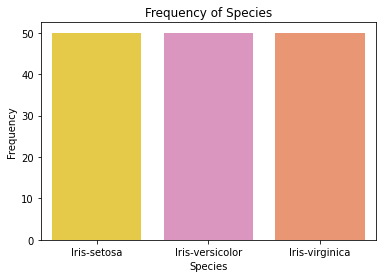

In [90]:
# make a barplot of the Frequency of Species
sns.countplot(data = iris, x = 'Species', palette = 'Set2_r')
plt.title('Frequency of Species')
plt.ylabel('Frequency')
plt.show()

<Figure size 720x360 with 0 Axes>

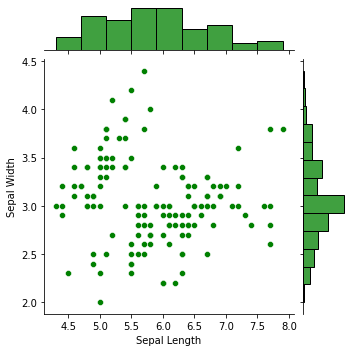

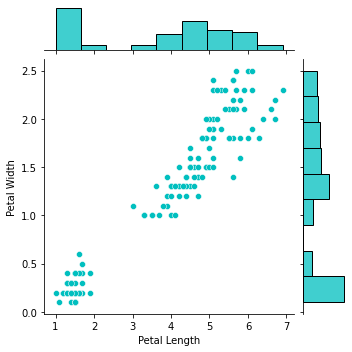

In [93]:
# make a scatterplot of sepal and petal length and width respectively
plt.figure(figsize=(10,5))
sns.jointplot(data = iris, x = 'Sepal Length', y = 'Sepal Width', size = 5, color = 'g')
sns.jointplot(data = iris, x = 'Petal Length', y = 'Petal Width', size = 5, color = 'c')
plt.show()

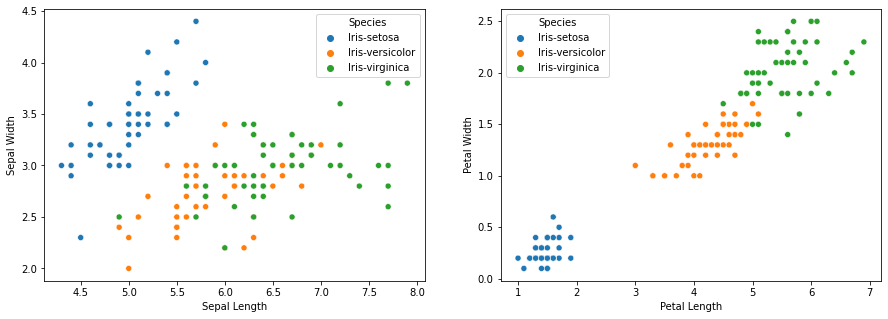

In [94]:
# make a scatterplot of the Iris features using 'Species'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data = iris, x = 'Sepal Length', y = 'Sepal Width', hue = 'Species')
plt.subplot(1,2,2)
sns.scatterplot(data = iris, x = 'Petal Length', y = 'Petal Width', hue = 'Species')
plt.show()

* The above scatter plot with hue shows that for the species 'setosa', both the petal length and petal width have smaller values as compared to the other species. 'Virginica' has the highest value for both the petal length and petal width.
* However, the species 'setosa' has the highest sepal width but 'virginica' has the highest sepal length.

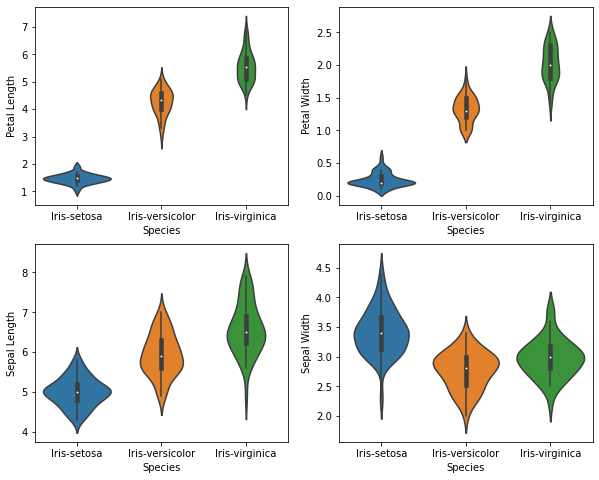

In [80]:
# create a voilin plot of the Iris features wrt 'Species'
col = ["Petal Length", "Petal Width", "Sepal Length", "Sepal Width"]
num = 1
plt.figure(figsize = (10,8))
for i in col:
    plt.subplot(2,2,num)
    sns.violinplot(x = 'Species', y = i, data = iris)
    num += 1
plt.show()

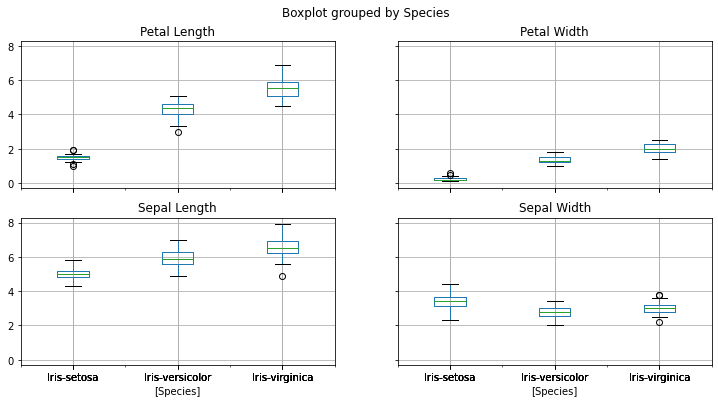

In [81]:
# Box plot grid
iris.boxplot(by = 'Species', figsize = (12, 6))
plt.show()

* The grouped boxplot shows a significant difference between the petal lengths of all the three species. Also, we can observe that there are some outliers for 'setosa', 'versicolor'.
* The grouped boxplot shows that the petal width lies between 0-2 for all the three species. Also, we can observe that there is an outlier for 'setosa'.
* The grouped boxplot doesn't shows the significant difference between the sepal lengths of all the three species, however, the range lies between 4 to 8. Also, we can observe that there is an outlier for 'virginica'.
* The grouped boxplot shows that the sepal width lies between 2-4, however, we can observe that there is an outlier for 'virginica'.
* The species 'setosa' has the lowest value, while 'virginica' has the highest value for almost all the attributes.

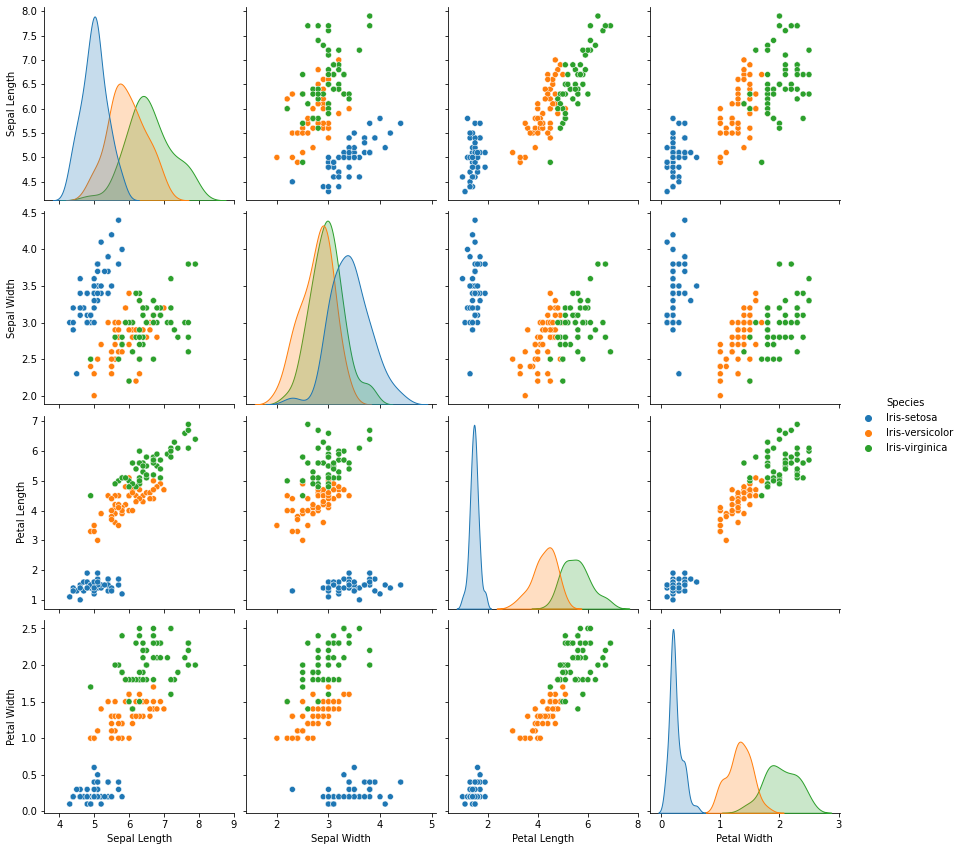

In [82]:
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# To visualize the whole dataset we used the seaborn pair plot method. It plots the whole dataset’s information.
# two across all feature combinations
sns.pairplot(iris, hue = 'Species', size = 3)
plt.show()

* From this visualization, we can tell that iris-setosa is well separated from the other two flowers.
* And iris virginica is the longest flower and iris setosa is the shortest.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Machine Learning  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>  

In [83]:
# Seperating the data into dependent and independent variables
x = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

##### - Training the model
Using some of the commonly used algorithms, we will training our model to check how accurate every algorithm is. We will implementing the following algorithms and compare the result:
*  Logistic Regression
*  K-Nearest Neighbours
*  Support Vector Machine (SVM)
*  Decision Trees

#### LogisticRegression

In [84]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('\nAccuracy is', accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy is 1.0


#### K-Nearest Neighbours

In [85]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('\nAccuracy is',accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy is 1.0


#### Support Vector Machine (SVC)

In [86]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('\nAccuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy is 1.0


#### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('\nAccuracy is', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy is 1.0


___________________________________________________________________________________________________________________________________

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Conclusion 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* In this study, we explored the performance of four different machine learning algorithms, namely Logistic Regression, K-Nearest Neighbours (KNN), Support Vector Machine (SVM), and Decision Trees, for classifying iris species based on their measurements.

    1. The classification report gives a detailed report of the prediction.
    2. Precision defines the ratio of true positives to the sum of true positive and false positives.
    3. Recall defines the ratio of true positive to the sum of true positive and false negative.
    4. F1-score is the mean of precision and recall value.
    5. Support is the number of actual occurrences of the class in the specified dataset.
    
    
* The accuracy thus achieved across all four algorithms was 100%, indicating the models were able to accurately classify the iris species. 


* These results demonstrate the effectiveness of the selected algorithms for this particular classification task. 